### ConvConvPool with no data augmentation

In this notebook I decided to train the model on an architecture with 2 convolutional layers, followed by a Batch-Norm layer and a pooling layer. This would improve the granularity of the features detected by the convolutional network and help to identify more fine features in the spectrogram.

In [5]:
import matplotlib.pyplot as plt
import pickle

In [6]:
from convconvpool import Convtrain as conv
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=0.,
      width_shift_range=0.,
      height_shift_range=0.,
      shear_range=0.,
      zoom_range=0.,
      horizontal_flip=False,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('dataset/', target_size = (128,1024), batch_size = 20, 
                                                    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory('validation/', target_size = (128,1024), batch_size =20,
                                                       class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory('test/', target_size = (128,1024), batch_size = 20,
                                                 class_mode = 'categorical')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Model = conv(input_shape=(128,1024,3))
Model.compile()
print(Model.model.summary())
history = Model.fit_generator(train_generator, validation_generator, epochs=20)

Found 6394 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
data batch shape: (20, 128, 1024, 3)
labels batch shape: (20, 8)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 512, 32)       416       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 256, 32)       4128      
                                                                 
 batch_normalization_3 (Batc  (None, 32, 256, 32)      128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 128, 32)      0         
 2D)                                                             
                                                               

In [10]:
a = history.history

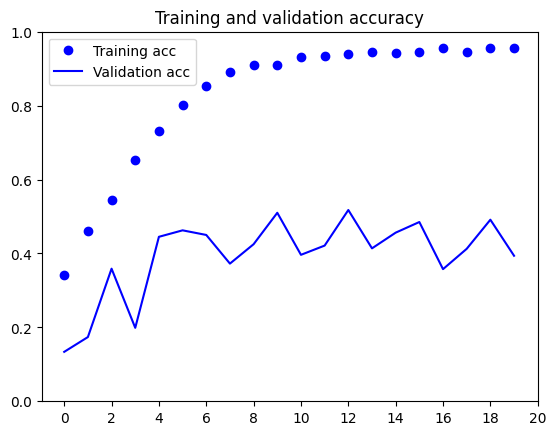

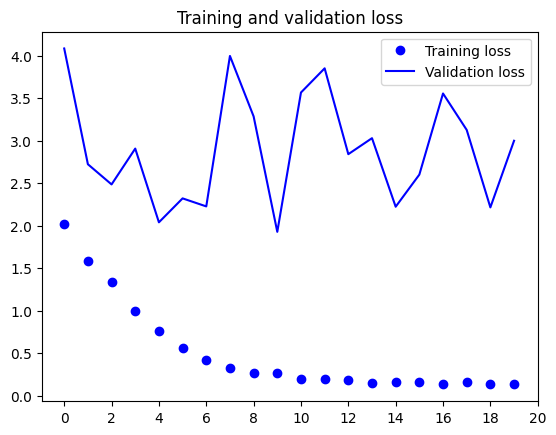

In [11]:
acc = a['accuracy']
val_acc = a['val_accuracy']
loss = a['loss']
val_loss = a['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
ax = plt.gca()
ax.set_ylim(0,1)
ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
ax = plt.gca()
ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.legend()

plt.show()


Although this model fits very quickly with no data augmentation on the training set, it still overfits with the training set against the validation set. Augmentation will help here.